베스트셀러_최종버전12.csv
비베스트셀러_최종버전11.csv

In [1]:
import pandas as pd
df = pd.read_csv('베스트셀러_최종버전12.csv')
df1 = pd.read_csv('비베스트셀러_최종버전11.csv')

In [3]:
df.columns

Index(['TITLE', 'AUTHOR', 'PUBLER', 'CLASS_NO', 'PUBLER_YEAR', 'PAGE', 'ISBN',
       'kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'LOAN_COUNT',
       'E_BOOK', 'kyobo_po', 'kyobo_ne', 'kyobo_pnscore', 'kyobo_review',
       'kyobo_rating', 'kyobo_score', 'aladin_po', 'aladin_ne',
       'aladin_pnscore', 'aladin_review', 'aladin_rating', 'aladin_score',
       'yp_po', 'yp_ne', 'yp_pnscore', 'yp_review', 'yp_rating', 'yp_score',
       'yes24_po', 'yes24_ne', 'yes24_pnscore', 'yes24_review', 'yes24_rating',
       'yes24_score'],
      dtype='object')

In [2]:
test = df[['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'kyobo_score', 'aladin_score', 'yp_score', 'yes24_score']]
test

,kyobo_best,aladin_best,yes24_best,yp_best,kyobo_score,aladin_score,yp_score,yes24_score
0,0.0,1.0,1.0,0.0,16.14,7.38,0.00,8.04
1,1.0,0.0,1.0,1.0,8.02,4.72,2.95,7.14
2,1.0,1.0,1.0,1.0,19.00,10.20,2.69,7.17
3,0.0,1.0,0.0,0.0,3.20,4.43,0.00,3.48
4,1.0,1.0,1.0,0.0,13.32,2.97,0.00,7.76
...,...,...,...,...,...,...,...,...
5138,0.0,1.0,0.0,0.0,2.88,3.05,0.00,0.00
5139,0.0,0.0,0.0,1.0,3.04,2.60,0.00,0.00
5140,0.0,1.0,0.0,0.0,3.20,2.62,0.00,0.00
5141,1.0,0.0,1.0,1.0,4.12,2.90,3.00,0.00


# 정규분포 확인

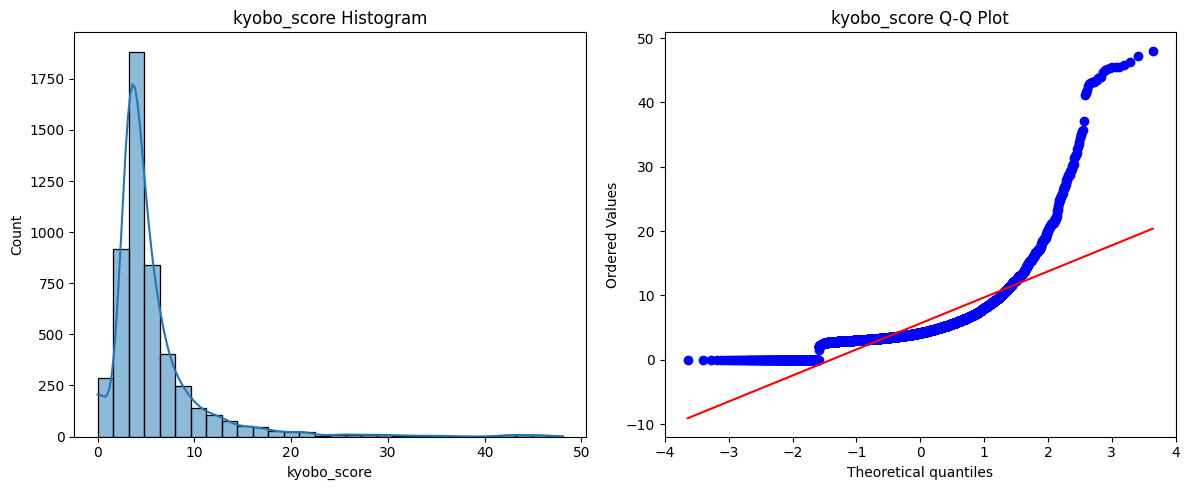

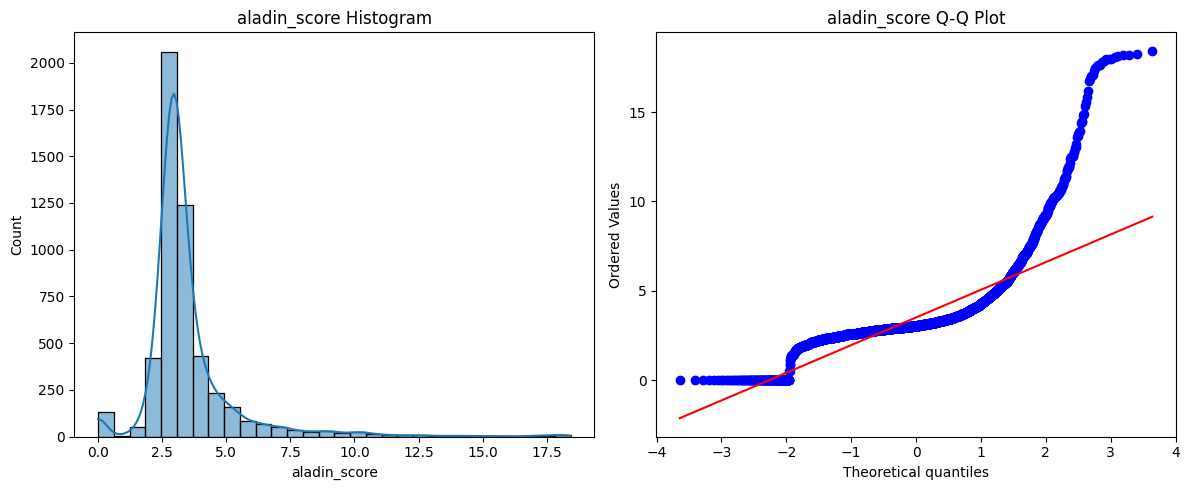

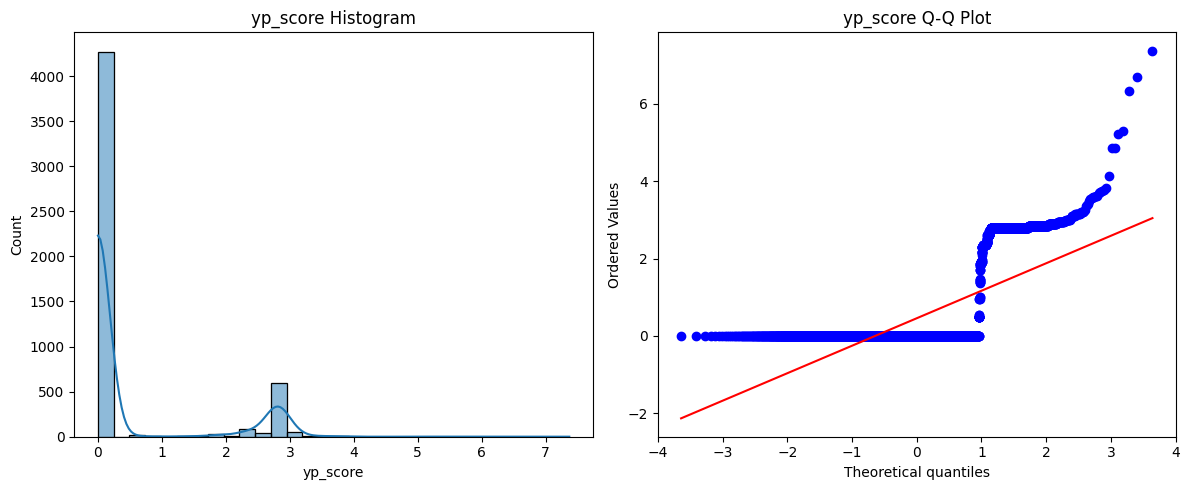

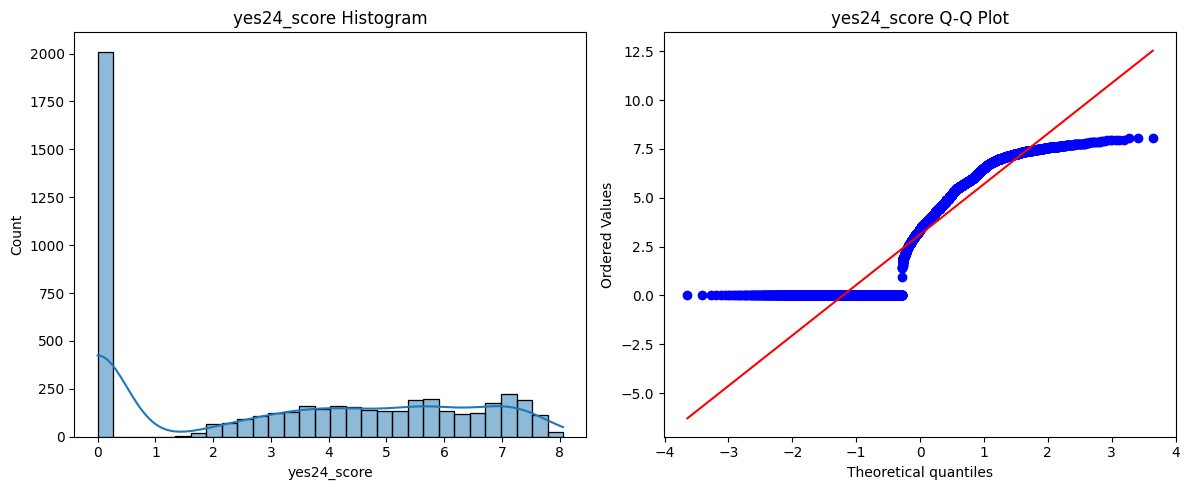

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

score_columns = ['kyobo_score', 'aladin_score', 'yp_score', 'yes24_score']

for col in score_columns:
    plt.figure(figsize=(12, 5))
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Histogram')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col} Q-Q Plot')
    
    plt.tight_layout()
    plt.show()


In [24]:
from scipy.stats import shapiro

for col in score_columns:
    stat, p = shapiro(df[col])
    print(f'{col} - Shapiro-Wilk p-value: {p:.4f}')


kyobo_score - Shapiro-Wilk p-value: 0.0000
aladin_score - Shapiro-Wilk p-value: 0.0000
yp_score - Shapiro-Wilk p-value: 0.0000
yes24_score - Shapiro-Wilk p-value: 0.0000


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5143.
  res = hypotest_fun_out(*samples, **kwds)


# 점수 상위 20% 데이터 분리, 나중에 테스트용 데이터 분리
test = 전체데이터
test1 = 교보 상위20%
test2 = 알라딘 상위 20%
test3 = 예사 상위 20%
test4 = 영풍 상위 20%

In [3]:
# 필요한 라이브러리
import pandas as pd

# 점수 열 목록
score_columns = ['kyobo_score', 'aladin_score', 'yes24_score']

# 각 열별로 상위 20% 추출해서 파일 저장
for col in score_columns:
    # 1. 상위 20% 기준값 계산
    threshold = test[col].quantile(0.80)
    
    # 2. 상위 20% 데이터 추출
    top_20 = test[test[col] >= threshold].copy()
    
    # 3. 파일명 지정
    file_name = f'{col}_top_20_percent.csv'
    
    # 4. CSV 파일로 저장
    top_20.to_csv(file_name, index=False)
    
    print(f"{col} 상위 20% → {file_name}로 저장 완료 (총 {len(top_20)}개)")


kyobo_score 상위 20% → kyobo_score_top_20_percent.csv로 저장 완료 (총 1032개)
aladin_score 상위 20% → aladin_score_top_20_percent.csv로 저장 완료 (총 1031개)
yes24_score 상위 20% → yes24_score_top_20_percent.csv로 저장 완료 (총 1030개)


In [4]:
# 영풍은 84% 전까지는 다 0이어서 84% 이상인 데이터만 사용
threshold = test['yp_score'].quantile(0.84)
top_20 = test[test['yp_score'] >= threshold].copy()
top_20.to_csv('yp_score_top_20_percent.csv', index=False)

In [ ]:
test['yp_score'].describe()

count    5143.000000
mean        0.457869
std         1.036770
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.370000
Name: yp_score, dtype: float64

In [5]:
test1 = pd.read_csv('kyobo_score_top_20_percent.csv')
test2 = pd.read_csv('aladin_score_top_20_percent.csv')
test3 = pd.read_csv('yes24_score_top_20_percent.csv')
test4 = pd.read_csv('yp_score_top_20_percent.csv')

# 스케일링 진행
정규분포가 아니기 때문에 MinMax 스케일링 사용

In [6]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링할 열 목록
score_columns = ['kyobo_score', 'aladin_score', 'yp_score', 'yes24_score']

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
scaler.fit(test[score_columns])
test[score_columns] = scaler.transform(test[score_columns])
test1[score_columns] = scaler.transform(test1[score_columns])
test2[score_columns] = scaler.transform(test2[score_columns])
test3[score_columns] = scaler.transform(test3[score_columns])
test4[score_columns] = scaler.transform(test4[score_columns])

C:\Users\user\AppData\Local\Temp\ipykernel_744\3309361635.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[score_columns] = scaler.transform(test[score_columns])


In [59]:
import pickle

# 인코더 pkl 파일 저장
with open('score_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [7]:
test1.drop(['aladin_score', 'yp_score', 'yes24_score'], axis=1, inplace=True)
test2.drop(['kyobo_score', 'yp_score', 'yes24_score'], axis=1, inplace=True)
test3.drop(['kyobo_score', 'yp_score', 'aladin_score'], axis=1, inplace=True)
test4.drop(['kyobo_score', 'yes24_score', 'aladin_score'], axis=1, inplace=True)

# 교차검증

In [66]:
test.columns

Index(['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best', 'kyobo_score',
       'aladin_score', 'yp_score', 'yes24_score'],
      dtype='object')

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

# 독립, 종속 변수 분할
X = test1.drop('kyobo_score', axis=1)
y = test1['kyobo_score']

# 모델 정의 및 교차검증 반복문
models = [
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("ElasticNet", ElasticNet(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42, verbosity=0))
]


for name, model in models:
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    rmse_scores = np.sqrt(-scores) # rmse값 계산

    print(f'{name}')
    print(f'R2 평균 {round(r2_scores.mean(),2)}')
    print(f'R2 표준편차 {round(r2_scores.std(),2)}')
    print(f'RMSE 평균 {round(rmse_scores.mean(),2)}')
    print(f'RMSE 표준편차 {round(rmse_scores.std(),2)}')

Decision Tree
R2 평균 -0.11
R2 표준편차 0.14
RMSE 평균 0.15
RMSE 표준편차 0.03
Random Forest
R2 평균 -0.1
R2 표준편차 0.14
RMSE 평균 0.15
RMSE 표준편차 0.03
Gradient Boosting
R2 평균 -0.11
R2 표준편차 0.14
RMSE 평균 0.15
RMSE 표준편차 0.03
ElasticNet
R2 평균 -0.11
R2 표준편차 0.07
RMSE 평균 0.15
RMSE 표준편차 0.04
XGBoost
R2 평균 -0.11
R2 표준편차 0.14
RMSE 평균 0.15
RMSE 표준편차 0.03


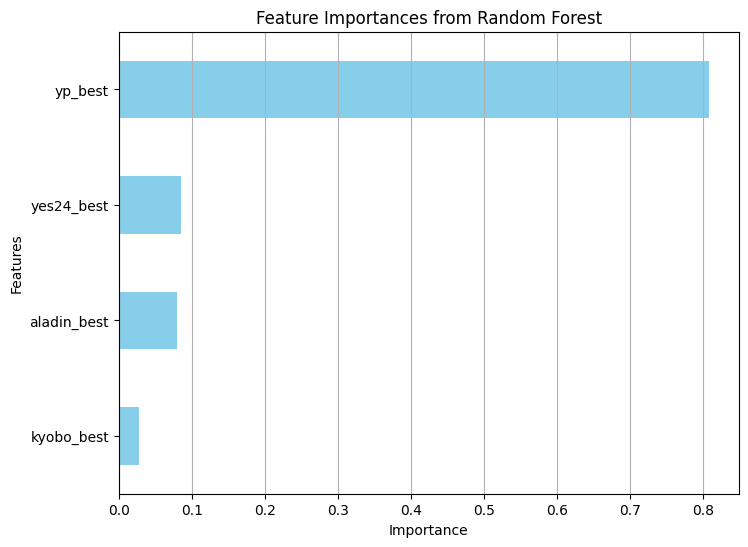

In [9]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 예: X, y 준비 (X는 feature 데이터프레임, y는 타겟 시리즈)
X = test1.drop('kyobo_score', axis=1)
y = test1['kyobo_score']

# 모델 학습
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# 변수 중요도 얻기
importances = rf.feature_importances_

# X가 여러 열을 가진 DataFrame이라고 가정
feat_importances = pd.Series(importances, index=X.columns)

# 내림차순 정렬
feat_importances = feat_importances.sort_values(ascending=True)

# 시각화
plt.figure(figsize=(8,6))
feat_importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:24:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


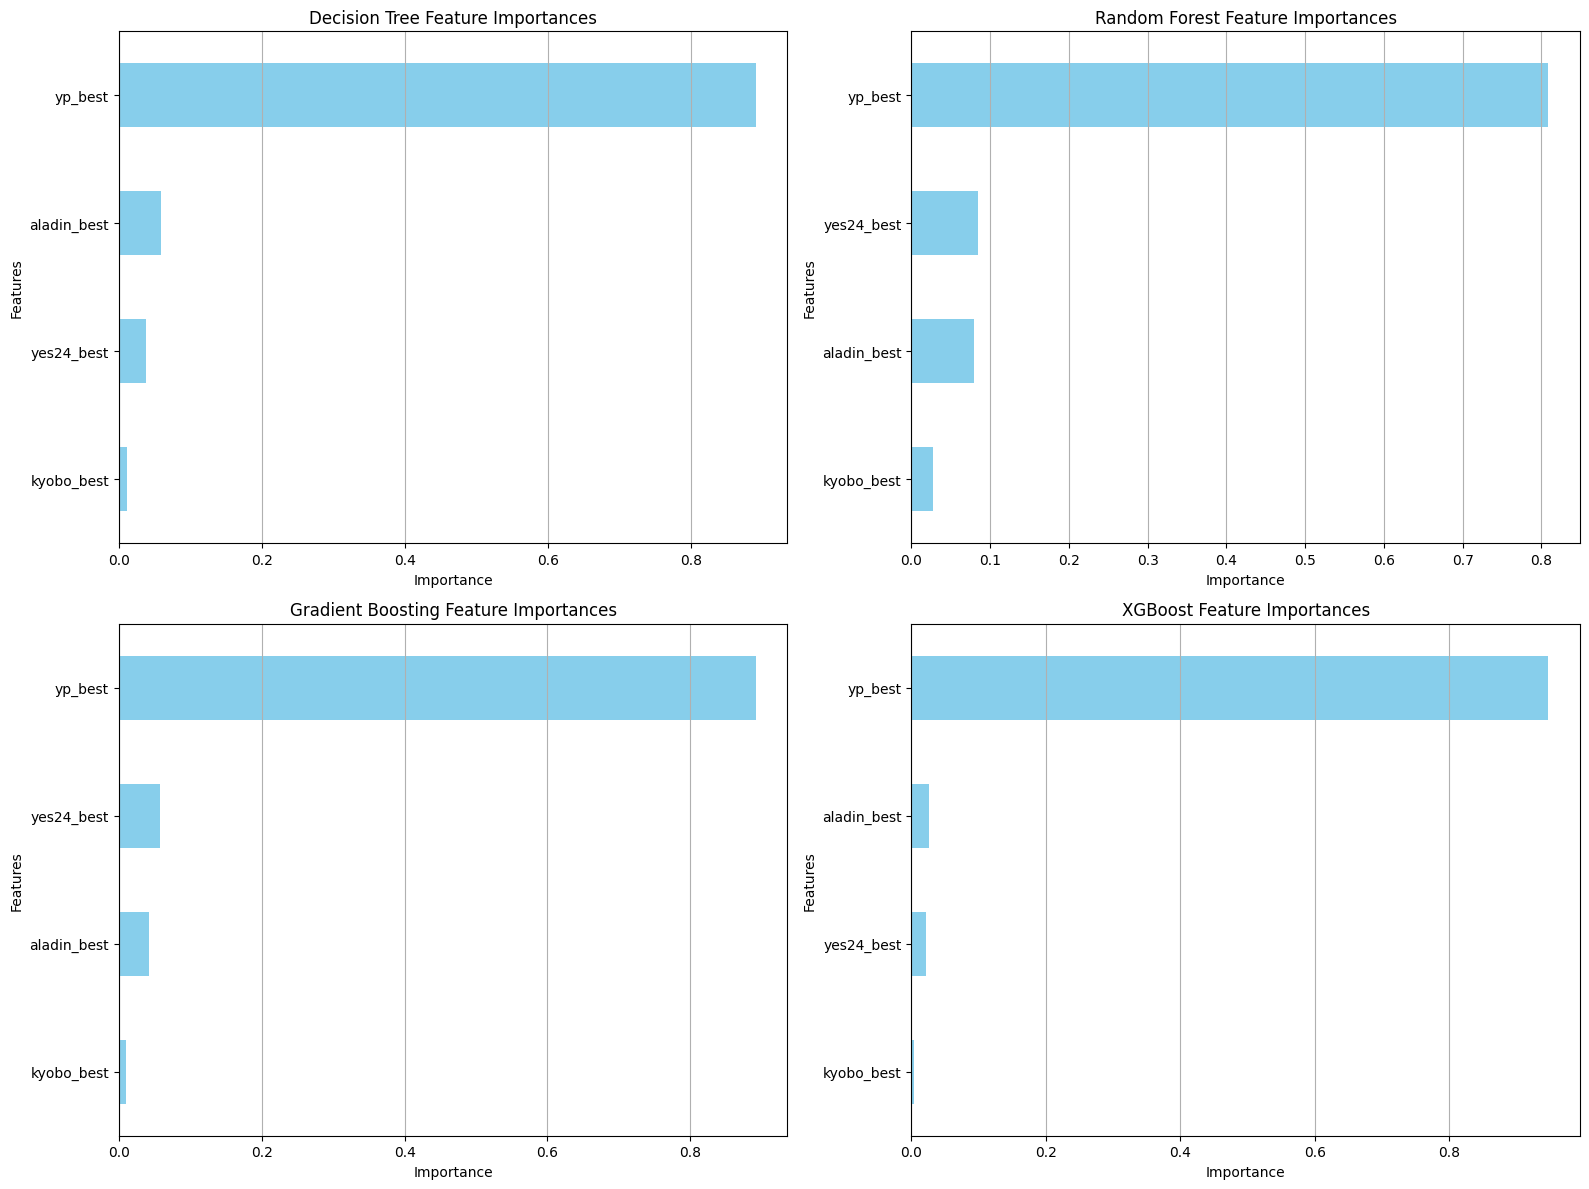

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# X, y 준비 (X는 feature 데이터프레임, y는 타겟 시리즈)
X = test1.drop('kyobo_score', axis=1)
y = test1['kyobo_score']

# 모델들 정의
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
}

plt.figure(figsize=(16, 12))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X, y)
    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

    plt.subplot(2, 2, i)
    feat_importances.plot(kind='barh', color='skyblue')
    plt.title(f'{name} Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.grid(axis='x')

plt.tight_layout()
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [15:35:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


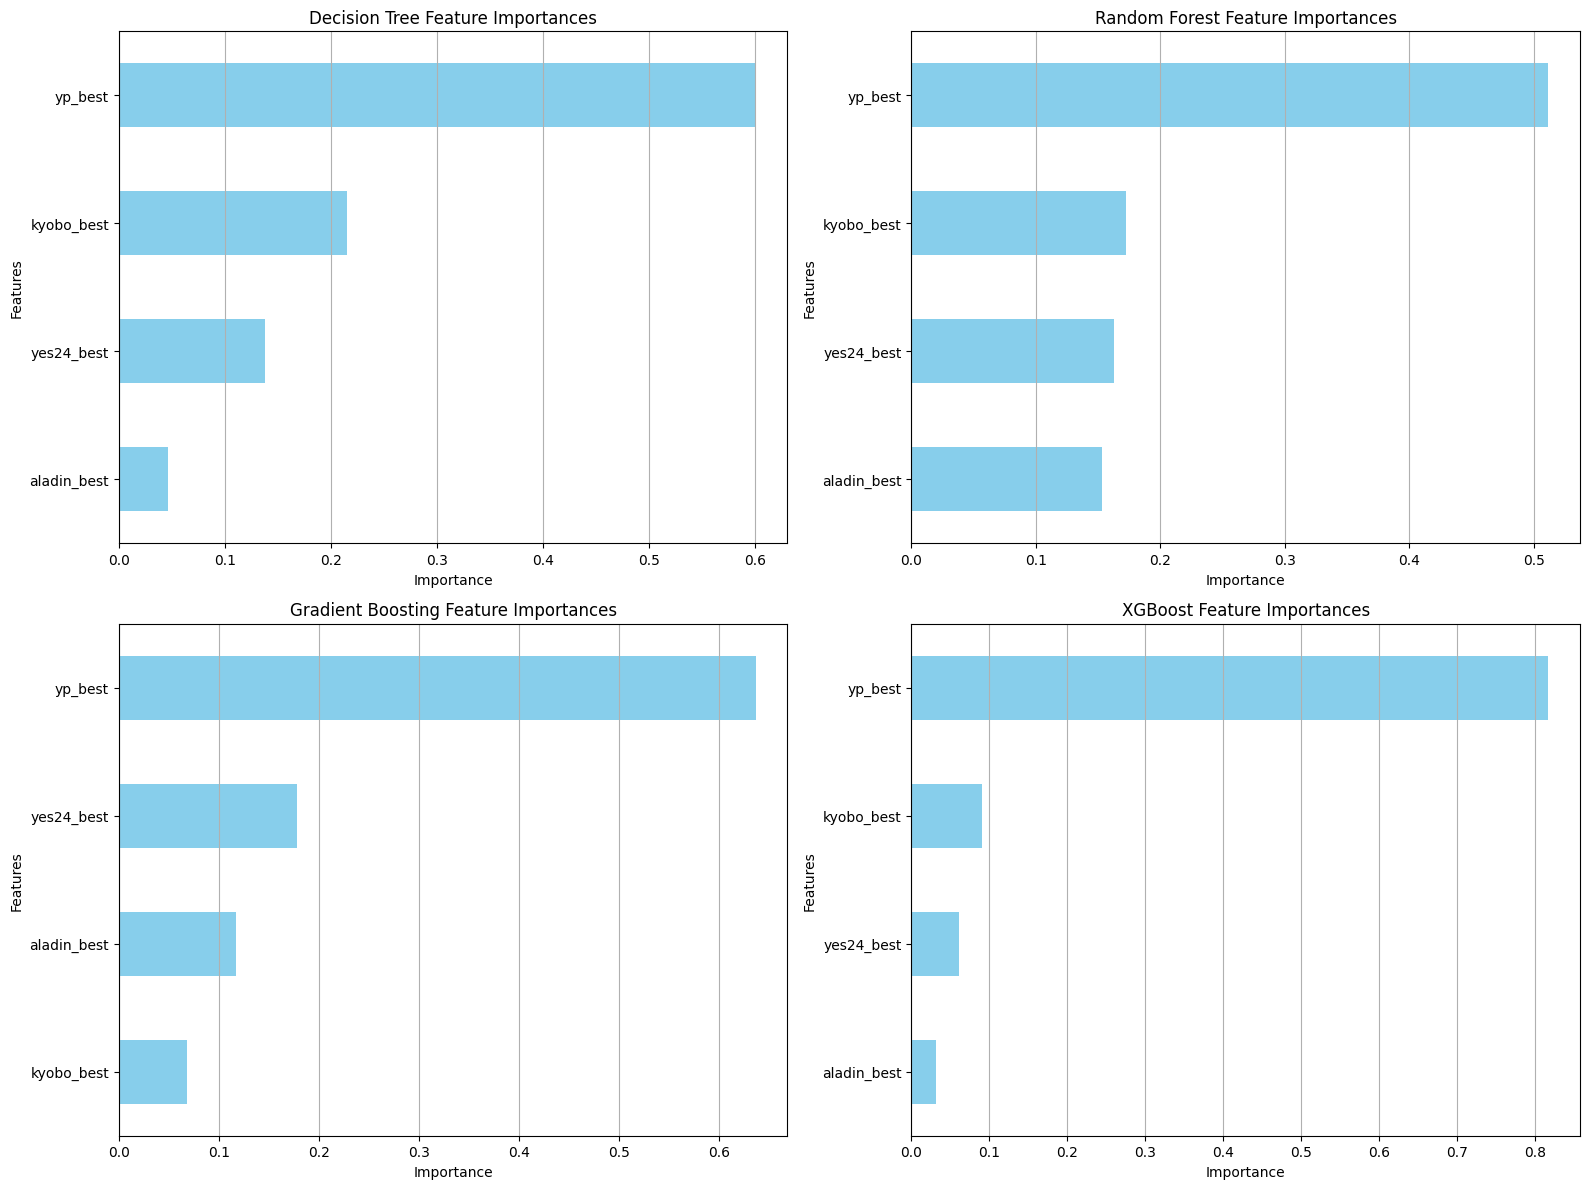

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# X, y 준비 (X는 feature 데이터프레임, y는 타겟 시리즈)
X = test2.drop('aladin_score', axis=1)
y = test2['aladin_score']

# 모델들 정의
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
}

plt.figure(figsize=(16, 12))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X, y)
    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

    plt.subplot(2, 2, i)
    feat_importances.plot(kind='barh', color='skyblue')
    plt.title(f'{name} Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.grid(axis='x')

plt.tight_layout()
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


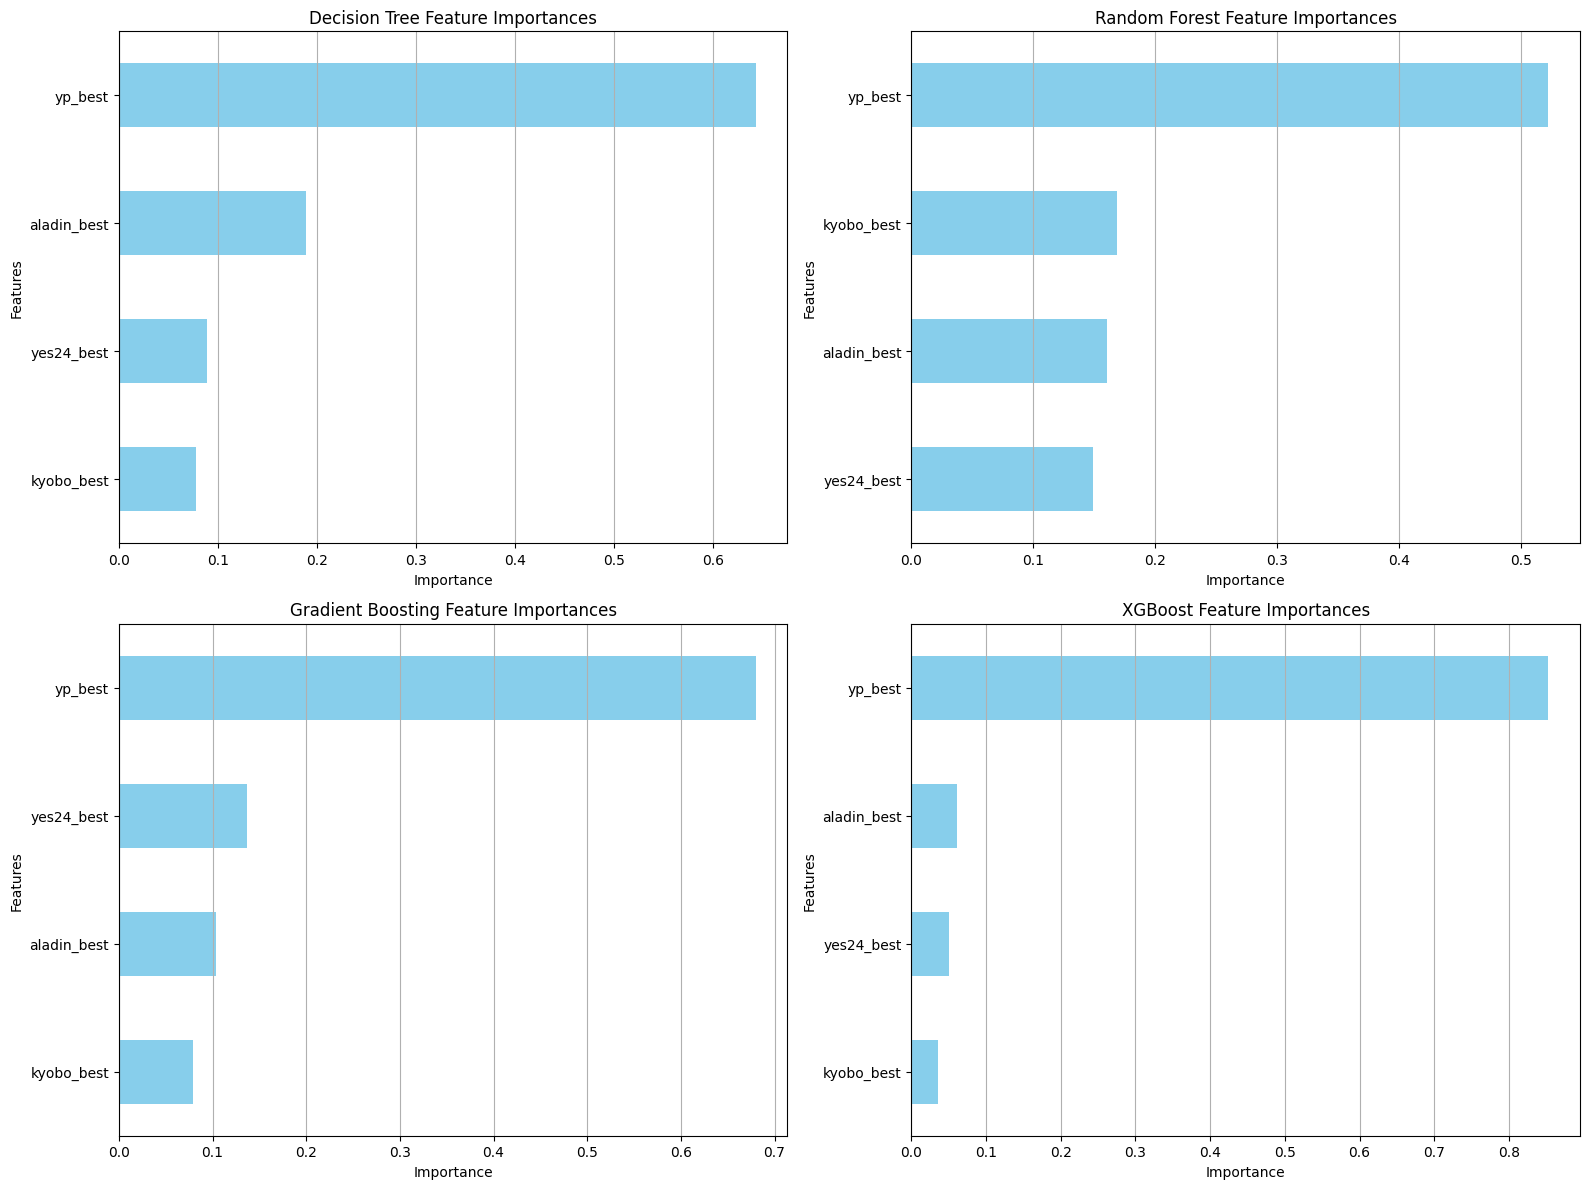

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# X, y 준비 (X는 feature 데이터프레임, y는 타겟 시리즈)
X = test3.drop('yes24_score', axis=1)
y = test3['yes24_score']

# 모델들 정의
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
}

plt.figure(figsize=(16, 12))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X, y)
    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

    plt.subplot(2, 2, i)
    feat_importances.plot(kind='barh', color='skyblue')
    plt.title(f'{name} Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.grid(axis='x')

plt.tight_layout()
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


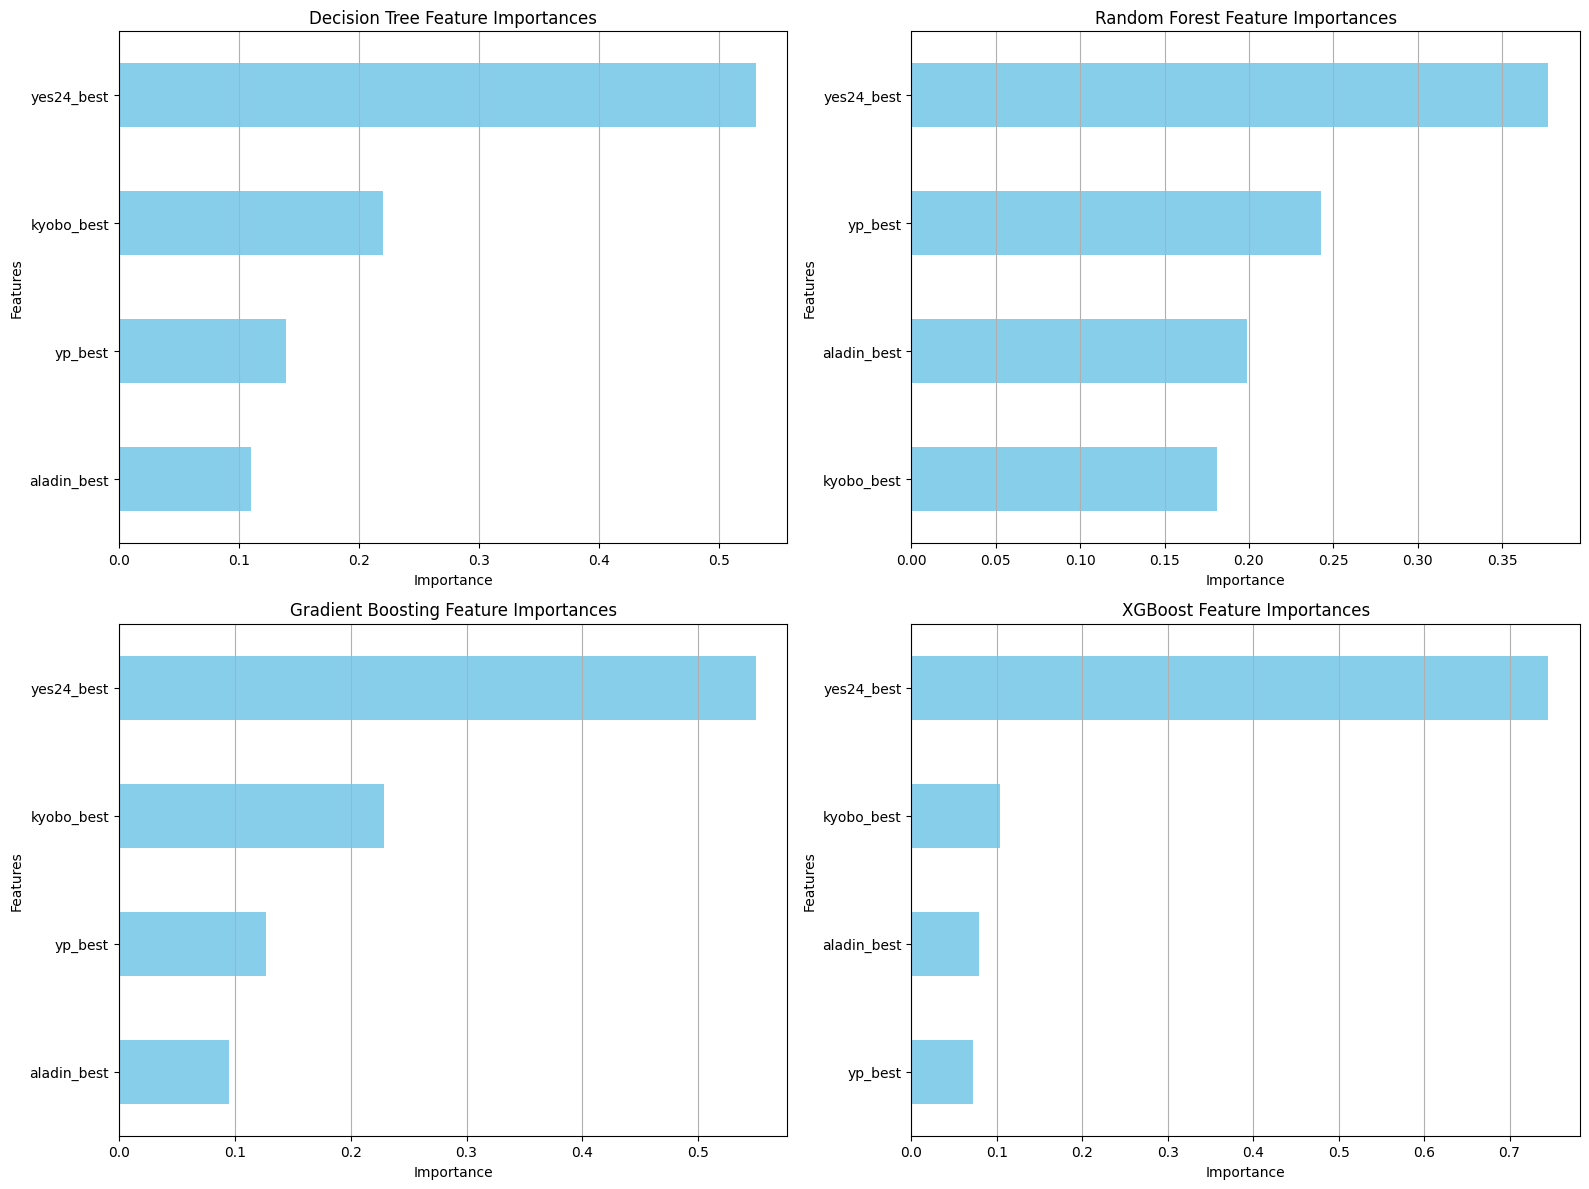

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# X, y 준비 (X는 feature 데이터프레임, y는 타겟 시리즈)
X = test4.drop('yp_score', axis=1)
y = test4['yp_score']

# 모델들 정의
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
}

plt.figure(figsize=(16, 12))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X, y)
    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

    plt.subplot(2, 2, i)
    feat_importances.plot(kind='barh', color='skyblue')
    plt.title(f'{name} Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.grid(axis='x')

plt.tight_layout()
plt.show()

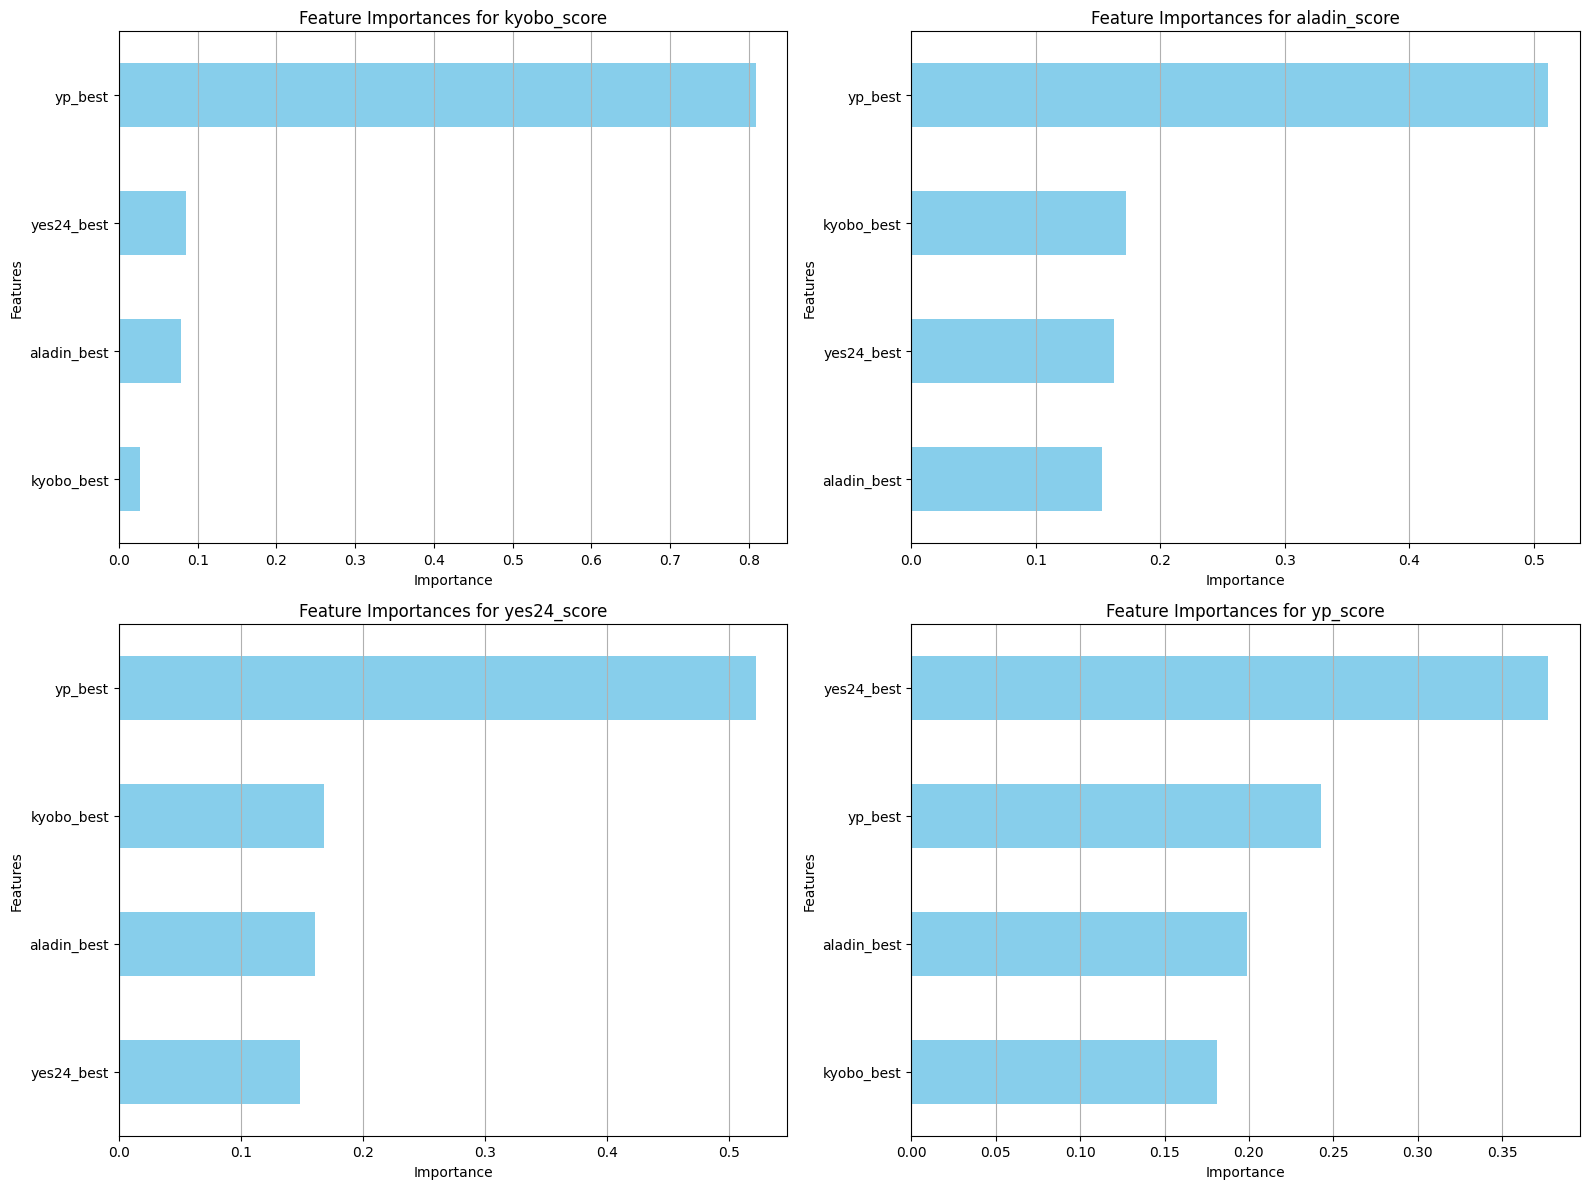

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def plot_feature_importance(data, target_col, ax=None):
    X = data.drop(target_col, axis=1)
    y = data[target_col]

    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

    if ax is None:
        plt.figure(figsize=(8,6))
        feat_importances.plot(kind='barh', color='skyblue')
        plt.title(f'Feature Importances for {target_col}')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.grid(axis='x')
        plt.show()
    else:
        feat_importances.plot(kind='barh', color='skyblue', ax=ax)
        ax.set_title(f'Feature Importances for {target_col}')
        ax.set_xlabel('Importance')
        ax.set_ylabel('Features')
        ax.grid(axis='x')

# 데이터와 타겟 컬럼을 리스트로 정리
datasets = [(test1, 'kyobo_score'),
            (test2, 'aladin_score'),
            (test3, 'yes24_score'),
            (test4, 'yp_score')]

# 4개의 그래프를 한 번에 보기
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16,12))

for (data, target), ax in zip(datasets, axs.flatten()):
    plot_feature_importance(data, target, ax=ax)

plt.tight_layout()
plt.show()


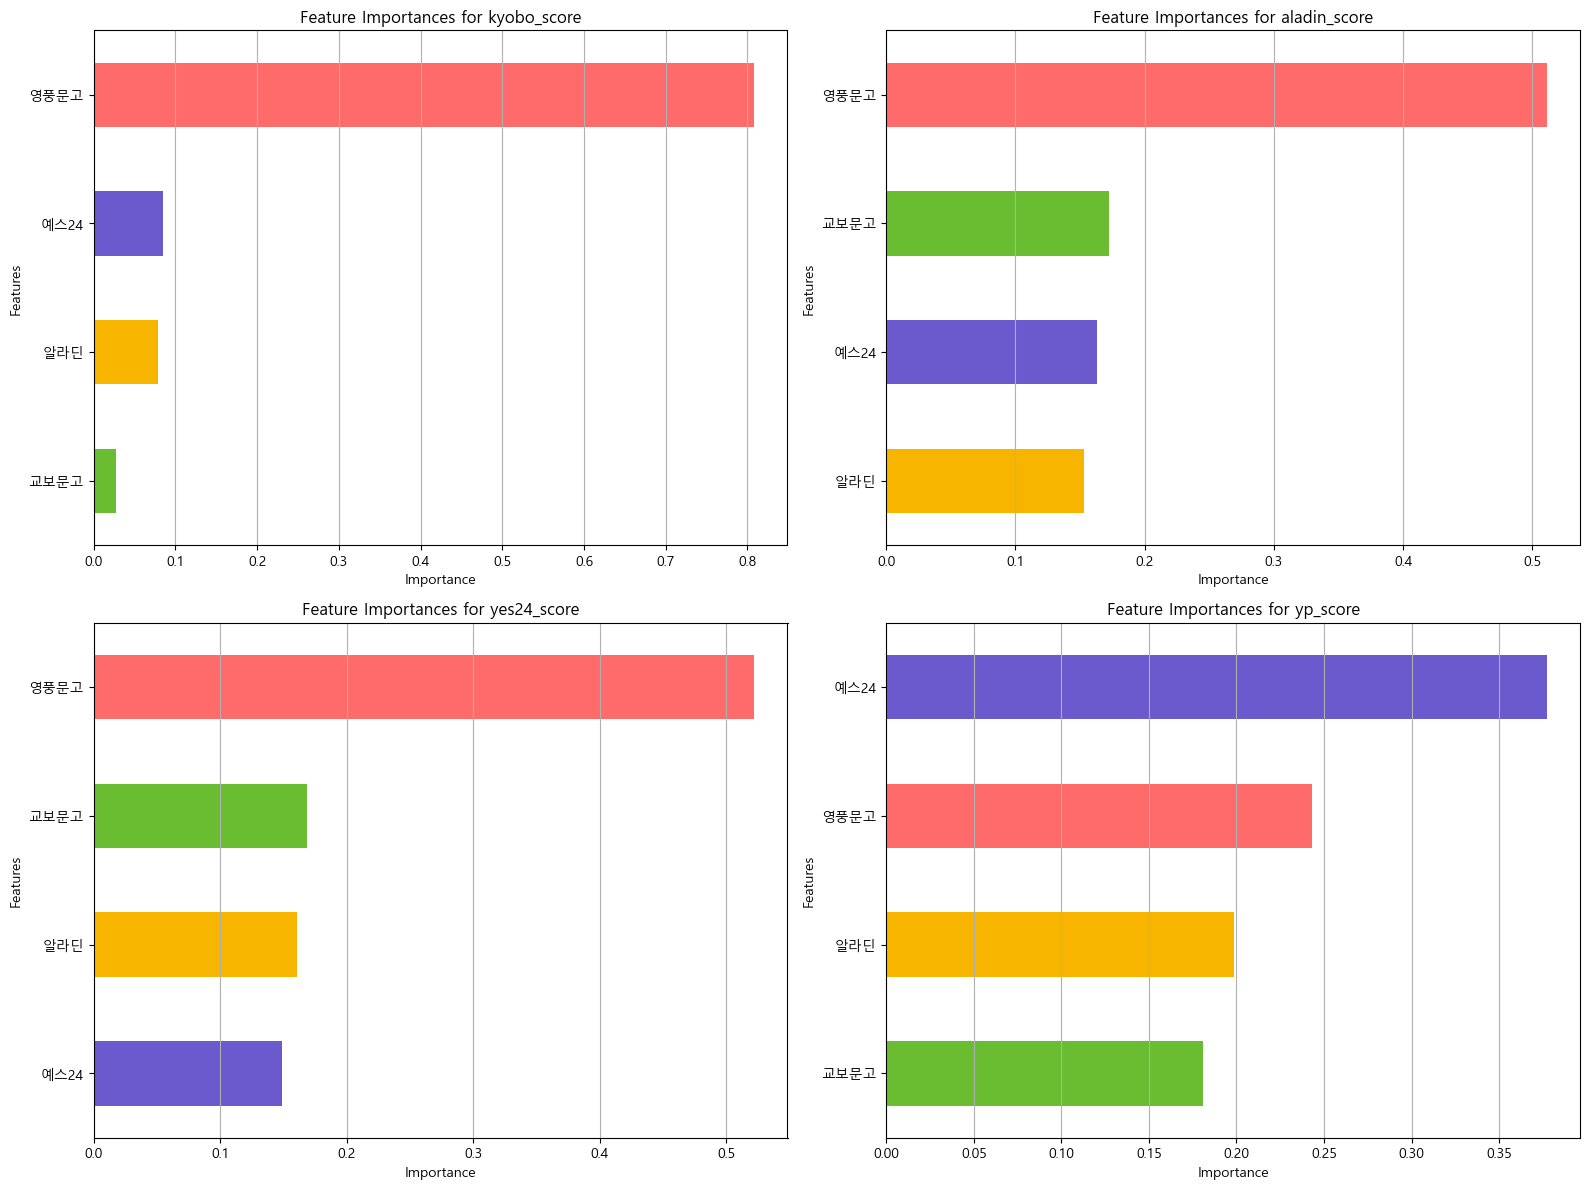

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def plot_feature_importance(data, target_col, ax=None):
    # 원래 컬럼명(영어) 리스트
    original_features = ['kyobo_best', 'yes24_best', 'aladin_best', 'yp_best']
    # 영어 -> 한국어 매핑
    feature_name_map = {
        'kyobo_best': '교보문고',
        'yes24_best': '예스24',
        'aladin_best': '알라딘',
        'yp_best': '영풍문고'
    }
    # colors: 교보문고, 예스24, 알라딘, 영풍문고 순서
    colors = ['#6ABD30', '#6A5ACD', '#F7B500', '#FF6B6B']
    
    X = data.drop(target_col, axis=1)
    y = data[target_col]

    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns)

    # 영어 컬럼명 -> 한국어명으로 변경
    feat_importances.index = feat_importances.index.map(feature_name_map)

    # 중요도 기준 오름차순 정렬
    feat_importances = feat_importances.sort_values(ascending=True)

    # 색깔도 정렬된 순서에 맞게 매칭하기 위해 색깔 리스트 재정렬
    # 중요도 순서에 맞는 색깔을 리스트로 생성
    sorted_colors = [colors[original_features.index(orig)] for orig in feat_importances.index.map({v:k for k,v in feature_name_map.items()})]

    if ax is None:
        plt.figure(figsize=(8,6))
        feat_importances.plot(kind='barh', color=sorted_colors)
        plt.title(f'Feature Importances for {target_col}')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.grid(axis='x')
        plt.show()
    else:
        feat_importances.plot(kind='barh', color=sorted_colors, ax=ax)
        ax.set_title(f'Feature Importances for {target_col}')
        ax.set_xlabel('Importance')
        ax.set_ylabel('Features')
        ax.grid(axis='x')

# 데이터와 타겟 컬럼을 리스트로 정리
datasets = [(test1, 'kyobo_score'),
            (test2, 'aladin_score'),
            (test3, 'yes24_score'),
            (test4, 'yp_score')]

fig, axs = plt.subplots(2, 2, figsize=(16,12))

for (data, target), ax in zip(datasets, axs.flatten()):
    plot_feature_importance(data, target, ax=ax)

plt.tight_layout()
plt.show()


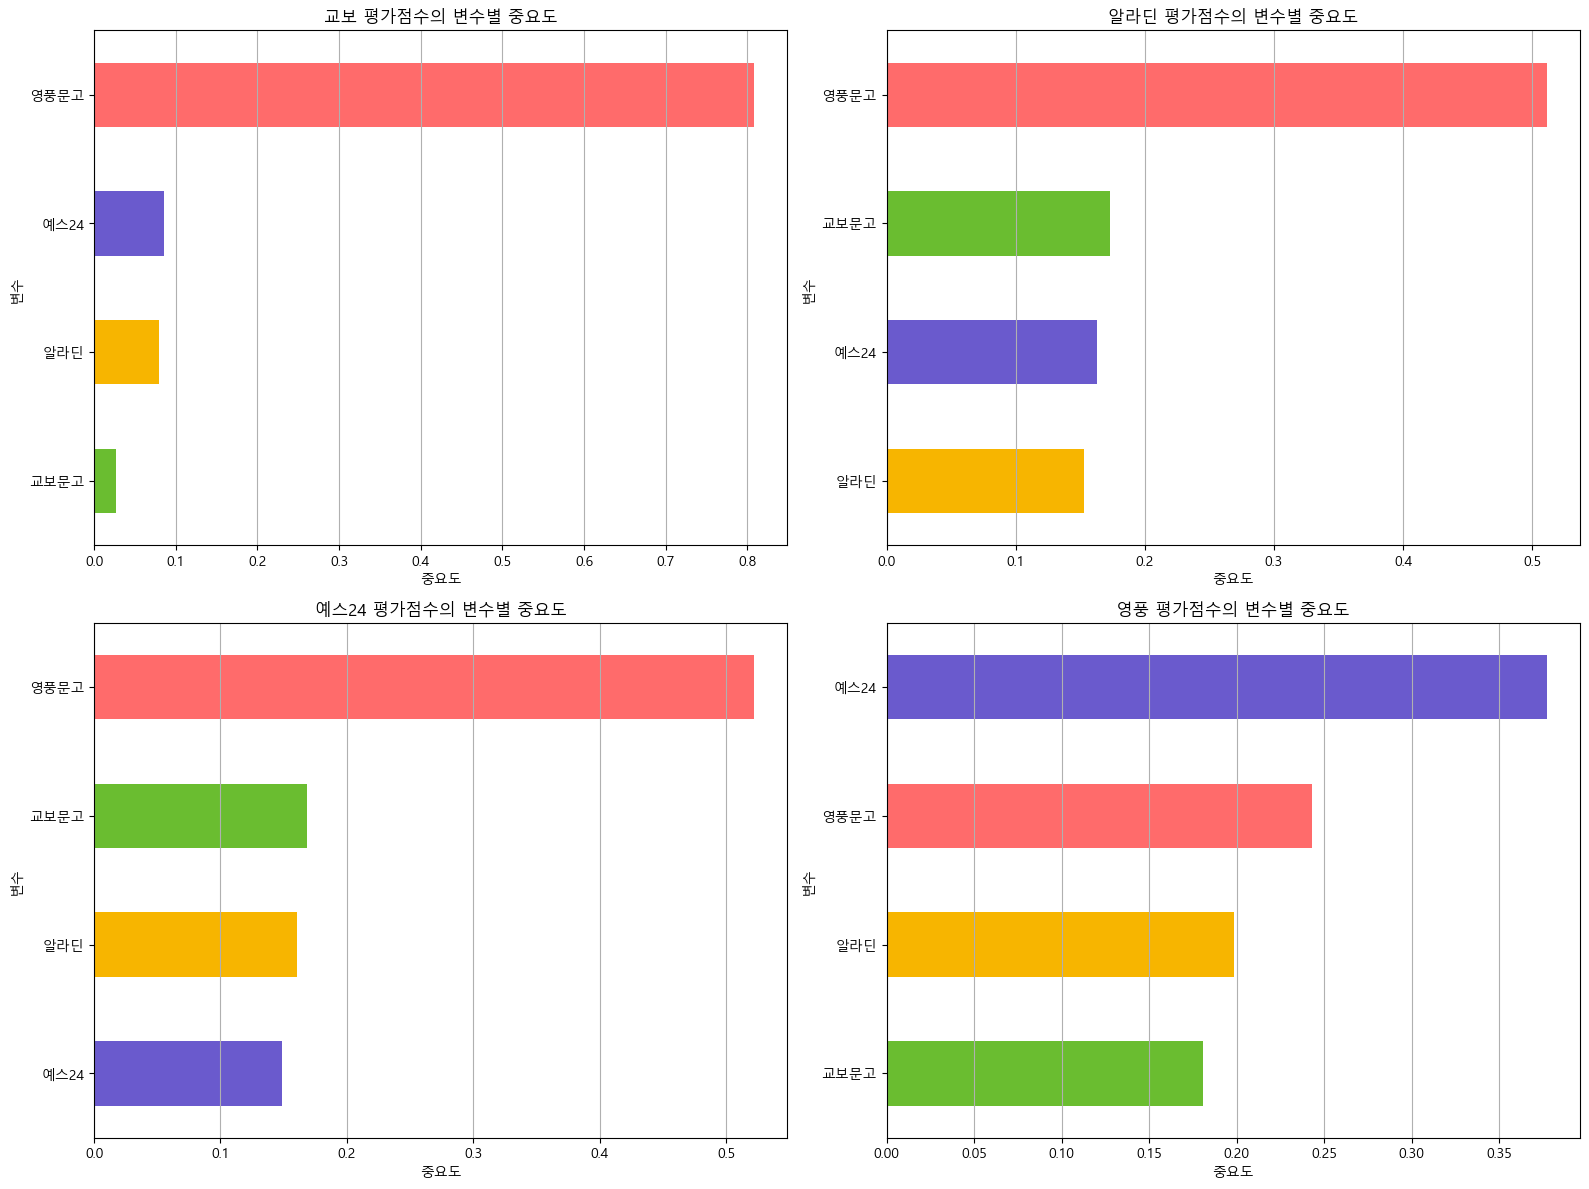

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def plot_feature_importance(data, target_col, ax=None):
    # 영어 -> 한국어 매핑
    feature_name_map = {
        'kyobo_best': '교보문고',
        'yes24_best': '예스24',
        'aladin_best': '알라딘',
        'yp_best': '영풍문고'
    }
    # target_col 영어명 -> 한글명 매핑
    target_name_map = {
        'kyobo_score': '교보 평가점수',
        'yes24_score': '예스24 평가점수',
        'aladin_score': '알라딘 평가점수',
        'yp_score': '영풍 평가점수'
    }
    colors = ['#6ABD30', '#6A5ACD', '#F7B500', '#FF6B6B']
    original_features = ['kyobo_best', 'yes24_best', 'aladin_best', 'yp_best']

    X = data.drop(target_col, axis=1)
    y = data[target_col]

    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns)

    # 영어 컬럼명 -> 한국어명으로 변경
    feat_importances.index = feat_importances.index.map(feature_name_map)

    # 중요도 기준 오름차순 정렬
    feat_importances = feat_importances.sort_values(ascending=True)

    # 색깔 재정렬
    sorted_colors = [colors[original_features.index(orig)] for orig in feat_importances.index.map({v:k for k,v in feature_name_map.items()})]

    # target_col 한글명 가져오기 (기본값은 target_col 그대로)
    target_kor_name = target_name_map.get(target_col, target_col)

    if ax is None:
        plt.figure(figsize=(8,6))
        feat_importances.plot(kind='barh', color=sorted_colors)
        plt.title(f'{target_kor_name}의 변수별 중요도')
        plt.xlabel('중요도')
        plt.ylabel('변수')
        plt.grid(axis='x')
        plt.show()
    else:
        feat_importances.plot(kind='barh', color=sorted_colors, ax=ax)
        ax.set_title(f'{target_kor_name}의 변수별 중요도')
        ax.set_xlabel('중요도')
        ax.set_ylabel('변수')
        ax.grid(axis='x')


datasets = [
    (test1, 'kyobo_score'),
    (test2, 'aladin_score'),
    (test3, 'yes24_score'),
    (test4, 'yp_score')
]

fig, axs = plt.subplots(2, 2, figsize=(16,12))

for (data, target), ax in zip(datasets, axs.flatten()):
    plot_feature_importance(data, target, ax=ax)

plt.tight_layout()
plt.show()


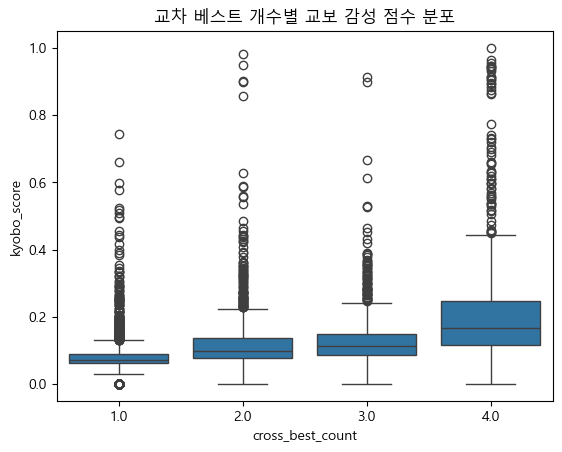

In [84]:
# 예시 코드
test_all = test.copy()
test_all['cross_best_count'] = test_all[['kyobo_best', 'aladin_best', 'yes24_best', 'yp_best']].sum(axis=1)
yp_books = test_all[test_all['yp_best'] == 1]
yp_books['cross_best_count'].value_counts().sort_index()
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
sns.boxplot(x='cross_best_count', y='kyobo_score', data=test_all)
plt.title('교차 베스트 개수별 교보 감성 점수 분포')
plt.show()
